In [1]:
import pandas as pd 
import numpy as np
from pulp import LpProblem, LpVariable,LpMaximize,LpMinimize,lpSum,LpStatus,LpConstraint

In [ ]:
from pulp import 

In [288]:
from scipy.optimize import linprog

In [7]:
obj = [-1, -2]
lhs_ineq = [[ 2,  1],[-4,  5], [ 1, -2]]  

In [16]:
rhs_ineq = [20,10,2]

In [17]:
lhs_eq = [[-1, 5]]  # Green constraint left side
rhs_eq = [15] 

In [18]:
bnd = [(0, float("inf")),(0, float("inf"))]

In [20]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd)

In [21]:
opt

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -16.818181818181817
              x: [ 7.727e+00  4.545e+00]
            nit: 0
          lower:  residual: [ 7.727e+00  4.545e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-2.727e-01]
        ineqlin:  residual: [ 0.000e+00  1.818e+01  3.364e+00]
                 marginals: [-6.364e-01 -0.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [28]:
obj = [3, 4]
lhs_ineq = [[1,2],[3,2]]  
rhs_ineq = [[4,6]]
# lhs_eq = [[-1, 5]]  # Green constraint left side
# rhs_eq = [15] 
bnd = [(0, float("inf")),(0, float("inf"))]

In [36]:
opt=linprog(c=obj,A_ub=lhs_ineq,b_ub=rhs_ineq,bounds=bnd)
opt

       message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
       success: True
        status: 0
           fun: 0.0
             x: [ 0.000e+00  0.000e+00]
           nit: 0
         lower:  residual: [ 0.000e+00  0.000e+00]
                marginals: [ 3.000e+00  4.000e+00]
         upper:  residual: [       inf        inf]
                marginals: [ 0.000e+00  0.000e+00]
         eqlin:  residual: []
                marginals: []
       ineqlin:  residual: [ 4.000e+00  6.000e+00]
                marginals: [-0.000e+00 -0.000e+00]

In [40]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq)
opt

       message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
       success: True
        status: 0
           fun: 0.0
             x: [ 0.000e+00  0.000e+00]
           nit: 0
         lower:  residual: [ 0.000e+00  0.000e+00]
                marginals: [ 3.000e+00  4.000e+00]
         upper:  residual: [       inf        inf]
                marginals: [ 0.000e+00  0.000e+00]
         eqlin:  residual: []
                marginals: []
       ineqlin:  residual: [ 4.000e+00  6.000e+00]
                marginals: [-0.000e+00 -0.000e+00]

In [42]:
objective=[20,12,40,25]
lhs_constraints=[[1,1,1,1],[3,2,1,0],[0,1,2,3]]
rhs_contraints=[50,100,90]

In [48]:
linprog(c=objective,A_ub=lhs_constraints,b_ub=rhs_contraints,method="revised simplex")

/var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/ipykernel_1951/2272592294.py:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  linprog(c=objective,A_ub=lhs_constraints,b_ub=rhs_contraints,method="revised simplex")


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.0
       x: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
     nit: 0

In [91]:
min_model=LpProblem(name="small-problem",sense=LpMinimize)
min_model

small-problem:
MINIMIZE
None
VARIABLES

In [92]:
x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

In [93]:
min_model += (2 * x + y <= 20, "red_constraint")
min_model += (4 * x - 5 * y >= -10, "black_constraint")
min_model += (-x + 2 * y >= -2, "yellow_constraint")
min_model += (-x + 5 * y == 15, "green_constraint")

In [96]:
min_model += lpSum([x, 2 * y])
min_model

/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


small-problem:
MINIMIZE
1*x + 2*y + 0
SUBJECT TO
red_constraint: 2 x + y <= 20

black_constraint: 4 x - 5 y >= -10

yellow_constraint: - x + 2 y >= -2

green_constraint: - x + 5 y = 15

VARIABLES
x Continuous
y Continuous

In [97]:
status=min_model.solve()
status

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/e1fe2c4cd828426795d82e56c17f1fac-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/e1fe2c4cd828426795d82e56c17f1fac-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 20 RHS
At line 25 BOUNDS
At line 26 ENDATA
Problem MODEL has 4 rows, 2 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-4) rows, 0 (-2) columns and 0 (-8) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 8.3333333
After Postsolve, objective 8.3333333, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 8.333333333 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptio

1

In [289]:
model=LpProblem(sense=LpMaximize)
model

NoName:
MAXIMIZE
None
VARIABLES

In [290]:
# # Initialize the decision variables
# x = LpVariable(name="x", lowBound=0)
# y = LpVariable(name="y", lowBound=0)

In [291]:
a=LpVariable(name="a", lowBound=0)
b=LpVariable(name="b", lowBound=0)
# c=LpVariable(name="c", lowBound=0)
# d=LpVariable(name="d", lowBound=0)
# e=LpVariable(name="e", lowBound=0)


In [292]:
m1=3*a + 2*b <= 60
m2=2*a + 7*b <= 60

In [273]:
# type(m1)

In [274]:
# m1= .5*a + 1*b + 1*c + 0.5* d+ 1*e <=60
# m2= 2*a + 2*b + .3*c + .6 * d + 1*e <=60

In [293]:
model.addConstraint(m1,"m1")
model.addConstraint(m2,"m2")

In [276]:
# model += lpSum(5*a + 5*b + 6*c + 6*d + 6*e)

In [297]:
model+=lpSum(10*a + 18*b)

In [298]:
model

NoName:
MAXIMIZE
10*a + 18*b + 0
SUBJECT TO
m1: 3 a + 2 b <= 60

m2: 2 a + 7 b <= 60

VARIABLES
__dummy = 0 Continuous
a Continuous
b Continuous

In [299]:
model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/64c287ca703d474f90657fb27012bfc8-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/64c287ca703d474f90657fb27012bfc8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
No match for column X0000000 at line 18 <  FX BND       X0000000   0.000000000000e+00 >
At line 19 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 1 errors
There were 1 errors on input
Option for timeMode changed from cpu to elapsed
** Current model not valid
Option for printingOptions changed from normal to all
** Current model not valid
No match for /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/64c287ca703d474f90657fb270

PulpSolverError: Pulp: Error while executing /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc

In [300]:
for i in model.variables():
    print(i.name)
    print(i.varValue)
    

__dummy
None
a
0.0
b
0.0


In [217]:
for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

m1: 0.0
m2: 0.0


In [218]:
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 5)}
print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")

for var in x.values():
    print(f"{var.name}: {var.value()}")

status: 1, Optimal
objective: 200.0
x1: None
x2: None
x3: None
x4: None


In [61]:
model += (5 *x + 4y <= 42000, "red_constraint")
model += (-x + 2 * y >= -2, "yellow_constraint")
model += (-x + 5 * y == 15, "green_constraint")

In [63]:
model += (4 * x - 5 * y >= -10, "black_constraint")


In [65]:
model += (12 * x - 10 * y >= -34, "milan")


In [66]:
model

small-problem:
MAXIMIZE
None
SUBJECT TO
blue_constraint: 2 x + 4 y >= 8

red_constraint: 2 x + y <= 20

yellow_constraint: - x + 2 y >= -2

green_constraint: - x + 5 y = 15

black_constraint: 4 x - 5 y >= -10

milan: 12 x - 10 y >= -34

VARIABLES
x Continuous
y Continuous

In [67]:
obj_func = x + 2 * y
model += obj_func

In [68]:
model

small-problem:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
blue_constraint: 2 x + 4 y >= 8

red_constraint: 2 x + y <= 20

yellow_constraint: - x + 2 y >= -2

green_constraint: - x + 5 y = 15

black_constraint: 4 x - 5 y >= -10

milan: 12 x - 10 y >= -34

VARIABLES
x Continuous
y Continuous

In [71]:
model += lpSum([x, 2 * y])

/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [75]:
status=model.solve()


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/b5a1c6a7abea4b7896a9ee6a0e93d27e-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/b5a1c6a7abea4b7896a9ee6a0e93d27e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 26 RHS
At line 33 BOUNDS
At line 34 ENDATA
Problem MODEL has 6 rows, 2 columns and 12 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-6) rows, 0 (-2) columns and 0 (-12) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 16.818182
After Postsolve, objective 16.818182, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 16.81818182 - 0 iterations time 0.002, Presolve 0.00
Option for print

In [79]:
print(f"status: {model.status}, {LpStatus[model.status]}")

status: 1, Optimal


In [80]:
print(f"objective: {model.objective.value()}")

objective: 16.8181817


In [81]:
for var in model.variables():
    print(f"{var.name}: {var.value()}")

x: 7.7272727
y: 4.5454545


In [82]:
for name, constraint in model.constraints.items():     
    print(f"{name}: {constraint.value()}")

blue_constraint: 25.6363634
red_constraint: -9.99999993922529e-08
yellow_constraint: 3.3636362999999996
green_constraint: -2.0000000233721948e-07
black_constraint: 18.181818300000003
milan: 81.27272740000001


In [116]:
# Define the model
model = LpProblem(name="resource-allocation", sense=LpMaximize)

# Define the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 5)}

# Add constraints
model += (lpSum(x.values()) <= 50, "manpower")
model += (3 * x[1] + 2 * x[2] + x[3] <= 100, "material_a")
model += (x[2] + 2 * x[3] + 3 * x[4] <= 90, "material_b")

# Set the objective
model += 20 * x[1] + 12 * x[2] + 40 * x[3] + 25 * x[4]

# Solve the optimization problem
status = model.solve()

# Get the results
print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")

for var in x.values():
    print(f"{var.name}: {var.value()}")

for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/0292c3a4523542669f1c2fdf663f8e4d-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/0292c3a4523542669f1c2fdf663f8e4d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 23 RHS
At line 27 BOUNDS
At line 28 ENDATA
Problem MODEL has 3 rows, 4 columns and 10 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 4 (0) columns and 10 (0) elements
0  Obj -0 Dual inf 97 (4)
0  Obj -0 Dual inf 97 (4)
2  Obj 1900
Optimal - objective value 1900
Optimal objective 1900 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):

In [113]:
model.objective

20*x1 + 12*x2 + 40*x3 + 25*x4 + 0

In [117]:
print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")

status: 1, Optimal
objective: 1900.0


In [118]:
for var in model.variables():
    print(f"{var.name}: {var.value()}")

x1: 5.0
x2: 0.0
x3: 45.0
x4: 0.0


In [119]:
for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

manpower: 0.0
material_a: -40.0
material_b: 0.0


In [120]:
model.constraints

OrderedDict([('manpower', 1*x1 + 1*x2 + 1*x3 + 1*x4 + -50 <= 0),
             ('material_a', 3*x1 + 2*x2 + 1*x3 + -100 <= 0),
             ('material_b', 1*x2 + 2*x3 + 3*x4 + -90 <= 0)])

In [281]:
from pulp import LpProblem, LpVariable, lpSum, LpMaximize

# Sample DataFrame
data = {
    'Product': ['A', 'B', 'C'],
    'Cost': [100, 200, 150],
    'Availability': [10, 20, 15]
}
df = pd.DataFrame(data)

In [307]:
import numpy as np


In [369]:
first_arr=np.linspace(0,2,100)
second_arr=np.linspace(2,0,100)

In [380]:
import pandas as pd 
import numpy as np
from pulp import LpProblem, LpVariable,LpMaximize,LpMinimize,lpSum,LpStatus,LpConstraint
       
A_count=[]
B_count=[]
obj_count=[]
for i in range(100):
    model=LpProblem(sense=LpMaximize)
    a=LpVariable(name="a", lowBound=0)
    b=LpVariable(name="b", lowBound=0)
    m1=3*a + 2*b <= 60
    m2=2*a + 7*b <= 60
    model.addConstraint(m1,"m1")
    model.addConstraint(m2,"m2")
    print(i)
    model+=lpSum(10*a + 18*b)
    model.solve()
    for k in model.variables():
        print(k.name)
        print(k.varValue)
        if k.name=="a":
            A_count.append(k.varValue)
        else:
            B_count.append(k.varValue)
        obj_count.append(model.objective.value())

0
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/b41d75cdc8e141648802ecd4c9473511-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/b41d75cdc8e141648802ecd4c9473511-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 240
Optimal - objective value 240
Optimal objective 240 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):   

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/5a7570c9e66943c9a0e8297e24b14b95-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/5a7570c9e66943c9a0e8297e24b14b95-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 240
Optimal - objective value 240
Optimal objective 240 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/8bc07b83f5624c8a992a9663607bc9fa-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/8bc07b83f5624c8a992a9663607bc9fa-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 240
Optimal - objective value 240
Optimal objective 240 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/05d42114ee704b01a5984abd0aac9a8d-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/05d42114ee704b01a5984abd0aac9a8d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 240
Optimal - objective value 240
Optimal objective 240 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/3f2015370b4341b29e12b1a3abebaa49-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/3f2015370b4341b29e12b1a3abebaa49-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 240
Optimal - objective value 240
Optimal objective 240 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/dac3b5c8020e46d3973b485463fe881e-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/dac3b5c8020e46d3973b485463fe881e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 240
Optimal - objective value 240
Optimal objective 240 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/41d750b079db4916885bf2fd12cf8512-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/41d750b079db4916885bf2fd12cf8512-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 240
Optimal - objective value 240
Optimal objective 240 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/7c2d8c07f9d84b9e9d1c434511f01363-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/7c2d8c07f9d84b9e9d1c434511f01363-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 240
Optimal - objective value 240
Optimal objective 240 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

In [381]:
model.objective.value()

In [384]:
np.arange(1,18)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [371]:
# variables=["a","b"]
# variables_store={}
# constraint_store={}
# for i in variables:
#     exec(f"{i}=LpVariable(name=i,lowBound=0)")
    

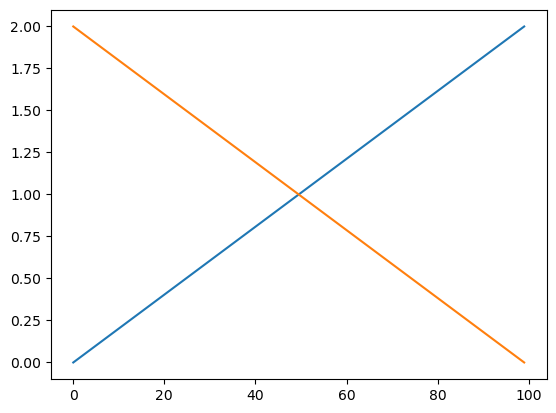

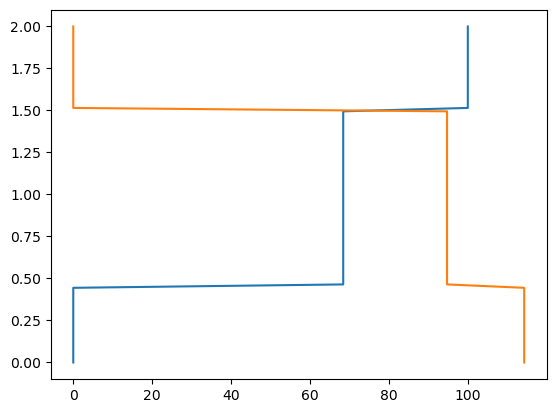

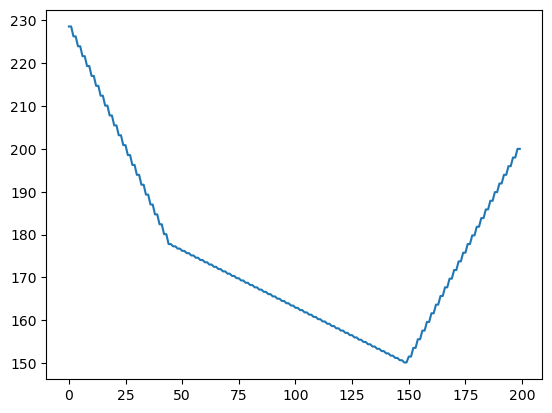

In [379]:
# plt.plot(first_arr,A_count)
# plt.show()
# plt.plot(second_arr,B_count)
# plt.show()
plt.plot(first_arr)
plt.plot(second_arr)
plt.show()
plt.plot(A_count,first_arr)
plt.plot(B_count,first_arr)
plt.show()
plt.plot(obj_count)
plt.show()

In [386]:
model.objective.value()

In [388]:
model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/38f885c6d7fc410bb7ac1c69e06a8ebc-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/38f885c6d7fc410bb7ac1c69e06a8ebc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 240
Optimal - objective value 240
Optimal objective 240 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

In [4]:
m1="3*a + 2*b <= 60"

In [5]:
model.addConstraint(eval(m1))

In [6]:
m2="2*a + 7*b <= 60"

In [7]:
model.addConstraint(eval(m2))

In [9]:
model+=lpSum(eval("10*a + 18*b"))

In [10]:
model

NoName:
MAXIMIZE
10*a + 18*b + 0
SUBJECT TO
_C1: 3 a + 2 b <= 60

_C2: 2 a + 7 b <= 60

VARIABLES
a Continuous
b Continuous

In [12]:
model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/83451a0adb6f44f3aef44585af0b71d5-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/83451a0adb6f44f3aef44585af0b71d5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 240
Optimal - objective value 240
Optimal objective 240 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

1

In [13]:
for i in model.variables():
    print(i.name)
    print(i.varValue)

a
17.647059
b
3.5294118


In [22]:
import pandas as pd

In [23]:
df=pd.read_clipboard()
df

week product  units_produced  Hours  machine_runtime_max_hours Machine_ID
0      1       A               6      5                         60         M1
1      2       A               4      2                         60         M1
2      3       A              10      5                         60         M1
3      4       A              12      3                         60         M1
4      5       A               7      4                         60         M1
5      6       A               7      3                         60         M1
6      7       A               6      2                         60         M1
7      8       A               5      2                         60         M1
8      9       A               7      1                         60         M1
9      1       B               6      2                         60         M1
10     2       B               2      2                         60         M1
11     3       B               9      1                         60         M1
12     4       B               9      2                         60         M1
13     5       B               8      1                         60         M1
14     6       B              12      3                         60         M1
15     7       B               7      2                         60         M1
16     8       B               4      2                         60         M1
17     9       B               2      3                         60         M1
18     1       A               5      3                         60         M2
19     2       A               5      2                         60         M2
20     3       A               9      1                         60         M2
21     4       A               2      1                         60         M2
22     5       A               5      2                         60         M2
23     6       A               9      2                         60         M2
24     7       A              10      3                         60         M2
25     8       A              11      1                         60         M2
26     9       A               6      3                         60         M2
27     1       B               5      4                         60         M2
28     2       B               2      7                         60         M2
29     3       B               3     12                         60         M2
30     4       B               3      6                         60         M2
31     5       B              10      5                         60         M2
32     6       B               2     11                         60         M2
33     7       B               5      4                         60         M2
34     8       B               6      8                         60         M2
35     9       B               5      6                         60         M2

In [31]:
df["Machine_ID"].unique()

array(['M1', 'M2'], dtype=object)

In [30]:
df["product"].unique()

array(['A', 'B'], dtype=object)

In [32]:
no_of_dimensions=list(df["product"].unique())
no_of_dimensions

['A', 'B']

In [33]:
list_of_constraints=list(df["Machine_ID"].unique())
list_of_constraints

['M1', 'M2']

In [27]:
import pandas as pd 
import numpy as np
from pulp import LpProblem, LpVariable,LpMaximize,LpMinimize,lpSum,LpStatus,LpConstraint
model=LpProblem(sense=LpMaximize)
# no_of_dimensions=["a","b"]
for i in no_of_dimensions:
    exec(f"{i}=LpVariable(name=i,lowBound=0)")
    
constraint_1="3*a + 2*b <= 60"
constraint_2="2*a + 7*b <= 60"
for i in [constraint_1,constraint_2]:
    model.addConstraint(eval(i))
    
model+=lpSum(eval("10*a + 18*b"))

model.solve()

for i in model.variables():
    print(i.name)
    print(i.varValue)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/7da419f7340845dc897cf0b532906bfa-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/7da419f7340845dc897cf0b532906bfa-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 240
Optimal - objective value 240
Optimal objective 240 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

In [15]:
constraint_1="3*a + 2*b <= 60"
constraint_2="2*a + 7*b <= 60"

In [16]:
for i in [constraint_1,constraint_2]:
    model.addConstraint(eval(i))

In [17]:
model+=lpSum(eval("10*a + 18*b"))

In [19]:
model

NoName:
MAXIMIZE
10*a + 18*b + 0
SUBJECT TO
_C1: 3 a + 2 b <= 60

_C2: 2 a + 7 b <= 60

VARIABLES
a Continuous
b Continuous

In [20]:
model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/039960789b0042cd82529bed27bae1af-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/039960789b0042cd82529bed27bae1af-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 240
Optimal - objective value 240
Optimal objective 240 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

1

In [75]:
df = pd.DataFrame({
"A": [3,2],
"B": [2,6],
"Direction": ["<=", "<="],
"RHS": [60,60]
})
df

A  B Direction  RHS
0  3  2        <=   60
1  2  6        <=   60

['A', 'B']

In [200]:
df = pd.DataFrame({
"A": [3,2],
"B": [2,6],
"Direction": ["<=", "<="],
"RHS": [60,60]
})
df

A  B Direction  RHS
0  3  2        <=   60
1  2  6        <=   60

In [139]:
cols_dim_length=[i for i in df.columns if i not in ["Direction","RHS"]]
cols_dim_length

['A', 'B']

In [140]:
for i in df[cols_dim_length]:
    df[i]=df[i].astype(str)+f"*{i}"

In [279]:
model=LpProblem(sense=1)

In [280]:
model

NoName:
MINIMIZE
None
VARIABLES

In [276]:
LpMaximize

In [142]:
df["constraint"]=""
for i in df.columns:
    if i =="constraint":
        continue
    if i in cols_dim_length[:-1]:
        df["constraint"]=df["constraint"].astype(str) + df[i].astype(str)+ "+"
    else:
        df["constraint"]=df["constraint"].astype(str) + df[i].astype(str)
        
    

In [159]:
par={
    "A":10,
    "B":18
}

In [160]:
objective_function=""
for i in cols_dim_length:
    print(i, par[i])
    objective_function+=f"{i} * {par[i]}+ "
    
objective_function=objective_function[:-2]
objective_function

A 10
B 18


'A * 10+ B * 18'

In [145]:
for i in cols_dim_length:
    exec(f"{i}=LpVariable(name=i,lowBound=0)")

In [148]:
for i in df["constraint"]:
    model.addConstraint(eval(i))

In [149]:
model+=lpSum(eval(objective_function))

In [150]:
model

NoName:
MAXIMIZE
10*A + 18*B + 0
SUBJECT TO
_C1: 3 A + 2 B <= 60

_C2: 2 A + 6 B <= 60

VARIABLES
A Continuous
B Continuous

In [151]:
model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/780e38b403914e7780144d04190f1a2c-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/780e38b403914e7780144d04190f1a2c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 248.57143
Optimal - objective value 248.57143
Optimal objective 248.5714286 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wall

1

In [152]:
for i in model.variables():
    print(i.name)
    print(i.varValue)

A
17.142857
B
4.2857143


In [111]:
par={
    "A":10,
    "B":18
}
par

{'A': 10, 'B': 18}

In [121]:
objective_function=""
for i in cols_dim_length:
    print(i, par[i])
    objective_function+=f"{i} * {par[i]}+ "

A 10
B 18


In [124]:
objective_function[:-2]

'A * 10+ B * 18'

In [392]:
def linear4(df1, par, var):
    df=df1.copy()
    from pulp import LpProblem, LpVariable, lpSum, LpMaximize
    import pandas as pd
    # Initialize an empty list to store results
    results = []

    # Define columns excluding "Direction" and "RHS"
    cols_dim_length = [i for i in df.columns if i not in ["Direction", "RHS"]]

    # Concatenate each column with its name
    for i in df[cols_dim_length]:
        df[i] = df[i].astype(str) + f"*{i}"

    # Create an LP problem
    model = LpProblem(sense=LpMaximize)

    # Concatenate all columns to form constraint expressions
    df["constraint"] = ""
    for i in df.columns:
        if i == "constraint":
            continue
        if i in cols_dim_length[:-1]:
            df["constraint"] = df["constraint"].astype(str) + df[i].astype(str) + "+"
        else:
            df["constraint"] = df["constraint"].astype(str) + df[i].astype(str)

    # Formulate the objective function
    objective_function = ""
    for i in cols_dim_length:
        objective_function += f"{i} * {par[i]}+ "

    objective_function = objective_function[:-2]

    # Add variables to the model
    for i in cols_dim_length:
        exec(f"{i}=LpVariable(name=i, lowBound=0)")
        
    for i in df["constraint"]:
        model.addConstraint(eval(i))

    # Add the objective function to the model
    model += lpSum(eval(objective_function))
    print(model)
    # Solve the model
    model.solve()

    # Iterate over variables and store results
    for var in model.variables():
        results.append([var.name, var.varValue])

    # Create a dataframe from the results
    result_df = pd.DataFrame(results, columns=["Variable", "Value"])

    return {"TEXT": result_df}

import pandas as pd
# Example DataFrame
df = pd.DataFrame({
    "A": [3, 2],
    "B": [2, 6],
    "Direction": ["<=", "<="],
    "RHS": [60, 60]
})

# Example parameter values
par = {"A": 1, "B": 2}

# Call the linear function and print the result
print(linear4(df, par, None))

NoName:
MAXIMIZE
1*A + 2*B + 0
SUBJECT TO
_C1: 3 A + 2 B <= 60

_C2: 2 A + 6 B <= 60

VARIABLES
A Continuous
B Continuous

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/668070a6acfa49fcbbcae02267f388ff-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/668070a6acfa49fcbbcae02267f388ff-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 2.9999998 (2)
0  Obj -0 Dual inf 2.9999998 (2)
2  Obj 25.714286
Optimal - objective value 25.714286
Optimal objective

In [2]:
def linear4(df1, par, var):
    df=df1.copy()
    from pulp import LpProblem, LpVariable, lpSum, LpMaximize
    import pandas as pd
    # Initialize an empty list to store results
    results = []

    # Define columns excluding "Direction" and "RHS"
    cols_dim_length = [i for i in df.columns if i not in ["Direction", "RHS"]]

    # Concatenate each column with its name
    for i in df[cols_dim_length]:
        df[i] = df[i].astype(str) + f"*{i}"

    # Create an LP problem
    model = LpProblem(sense=LpMaximize)

    # Concatenate all columns to form constraint expressions
    df["constraint"] = ""
    for i in df.columns:
        if i == "constraint":
            continue
        if i in cols_dim_length[:-1]:
            df["constraint"] = df["constraint"].astype(str) + df[i].astype(str) + "+"
        else:
            df["constraint"] = df["constraint"].astype(str) + df[i].astype(str)
            
    display(df)

    # Formulate the objective function
    objective_function = ""
    for i in cols_dim_length:
        objective_function += f"{i} * {par[i]}+ "

    objective_function = objective_function[:-2]

    # Add variables to the model
    for i in cols_dim_length:
        exec(f"{i}=LpVariable(name=i, lowBound=0)")
        
    for i in df["constraint"]:
        model.addConstraint(eval(i))

    # Add the objective function to the model
    model += lpSum(eval(objective_function))
    print(model)
    # Solve the model
    model.solve()

    # Iterate over variables and store results
    for var in model.variables():
        results.append([var.name, var.varValue])

    # Create a dataframe from the results
    result_df = pd.DataFrame(results, columns=["Variable", "Value"])

    return {"TEXT": result_df}

import pandas as pd
# Example DataFrame
df = pd.DataFrame({
    "A": [3, 4],
    "B": [2, 6],
    "C":[3,2],
    "Direction": ["<=", "<="],
    "RHS": [60, 60]
})
display(df)
# Example parameter values
par = {"A": 10, "B": 18,"C":19}

# Call the linear function and print the result
print(linear4(df, par, None))

A  B  C Direction  RHS
0  3  2  3        <=   60
1  4  6  2        <=   60

A    B    C Direction  RHS       constraint
0  3*A  2*B  3*C        <=   60  3*A+2*B+3*C<=60
1  4*A  6*B  2*C        <=   60  4*A+6*B+2*C<=60

NoName:
MAXIMIZE
10*A + 18*B + 19*C + 0
SUBJECT TO
_C1: 3 A + 2 B + 3 C <= 60

_C2: 4 A + 6 B + 2 C <= 60

VARIABLES
A Continuous
B Continuous
C Continuous

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/aac26be2e4a247aabf452e2bbbd1d364-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/aac26be2e4a247aabf452e2bbbd1d364-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 17 RHS
At line 20 BOUNDS
At line 21 ENDATA
Problem MODEL has 2 rows, 3 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 3 (0) columns and 6 (0) elements
0  Obj -0 Dual inf 47 (3)
0  Obj -0 Dual inf 47 (3)
2  Obj 402.85714
Optimal - objective value 402.857

In [281]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

In [283]:
# Create an object of a model
prob = LpProblem("Simple LP Problem", LpMinimize)

In [284]:
# Define the decision variables
x1 = LpVariable("x1", 0)
x2 = LpVariable("x2", 0)

In [164]:
# Define the objective function
prob += 60*x1 + 40*x2

In [285]:
# Define the constraints
prob += 4*x1 + 4*x2 >= 10.0, "1st constraint"
prob += 2*x1 + x2 >= 4.0, "2nd constraint"
prob += 6*x1 + 2*x2 <= 12.0, "3rd constraint"

In [286]:
# Solve the linear programming problem
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/96910621c30341ada3b17e29b5b71903-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/96910621c30341ada3b17e29b5b71903-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 16 RHS
At line 20 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 3 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-3) rows, 0 (-3) columns and 0 (-6) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 0
After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 0 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to 

In [167]:
# Print the results
print ("Status: ", LpStatus[prob.status])

Status:  Optimal


In [168]:

for v in prob.variables():
    print (v.name, "=", v.varValue)

x1 = 1.5
x2 = 1.0


In [173]:
x

array([0, 1, 2, 3])

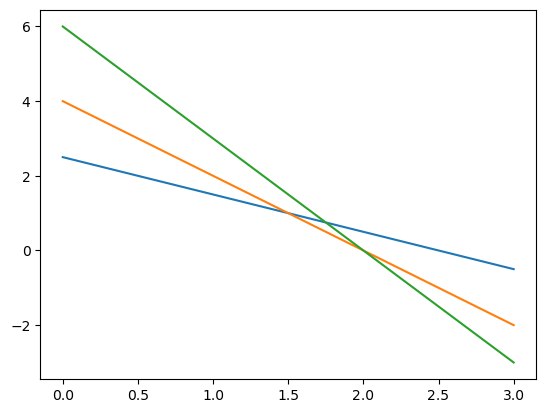

In [172]:
# Plot the optimal solution
x = np.arange(0, 4)
plt.plot(x, 2.5 - x, label = '4x1 + 4x2 >= 10')
plt.plot(x, 4 - 2 * x, label= ' 2x1 + x2 >= 4')
plt.plot(x, 6 - 3 * x, label = '6x1 + 2x2 <= 12')

# plt.axis([0, 3, 0, 6])
# plt.grid(True)
# plt.legend()
plt.show()

In [196]:
import pandas as pd 
import numpy as np
from pulp import LpProblem, LpVariable,LpMaximize,LpMinimize,lpSum,LpStatus,LpConstraint
model=LpProblem(sense=LpMaximize)
a=LpVariable(name="a", lowBound=0)
b=LpVariable(name="b", lowBound=0)
m1=3*a + 2*b <= 60
m2=2*a + 7*b <= 60
model.addConstraint(m1,"m1")
model.addConstraint(m2,"m2")
model+=lpSum(10*a + 18*b)
model.solve()
for i in model.variables():
    print(i.name)
    print(i.varValue)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/0e47241ac920467cb921194f9f05969a-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/0e47241ac920467cb921194f9f05969a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 28 (2)
0  Obj -0 Dual inf 28 (2)
2  Obj 240
Optimal - objective value 240
Optimal objective 240 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

In [178]:
a=12

In [180]:
3*a + 2*b

2*b + 36

In [186]:
from sympy import *
exec("A,B = symbols('A B')")

In [198]:
m1=3*a + 2*b
m1

3*a + 2*b + 0

In [201]:
df

A  B Direction  RHS
0  3  2        <=   60
1  2  6        <=   60

In [217]:
df["RHS/A"]=df["RHS"].astype(float)/df["A"].astype(float)

In [218]:
df["RHS/B"]=df["RHS"].astype(float)/df["B"].astype(float)

In [214]:
df = pd.DataFrame({
    "A": [1, 3],
    "B": [2, 2],
    "Direction": ["<=", "<="],
    "RHS": [4, 6]
})
df

A  B Direction  RHS
0  1  2        <=    4
1  3  2        <=    6

In [230]:
df_1=df.iloc[:,-2:]
df_1

RHS/A  RHS/B
0    4.0    2.0
1    2.0    3.0

In [240]:
list(reversed(range(2)))

In [243]:
df["origin"]=0

In [244]:
df

A  B Direction  RHS  RHS/A  RHS/B  A_origin  B_origin  origin
0  1  2        <=    4    4.0    2.0         0         1       0
1  3  2        <=    6    2.0    3.0         1         0       0

In [224]:
import plotly.express as px

In [ ]:
plt.plot()

In [251]:
# px.line(data_frame=df,x=["RHS/A","RHS/B"],y="origin")

In [252]:
plt.plot([df["RHS/A"],[0,0]],[[0,0],df['RHS/B']])
plt.show()
# plt.plot([df["RHS/B"][0],0],[0,df['RHS/B'][1]])

In [269]:
par={'A': 10, 'B': 18,"type":"max"}

In [270]:
import pandas as pd 
import numpy as np
from pulp import LpProblem, LpVariable,LpMaximize,LpMinimize,lpSum,LpStatus,LpConstraint

In [271]:
min_max=par.get('type')
print(min_max)

max


In [272]:
type_=LpMaximize if min_max=="max" else LpMinimize

In [274]:
model

In [35]:
import pandas as pd
input_dataset=pd.read_csv('/Users/mg_0328/Downloads/HumanResources_EmployeeDetails.csv',sep=";")
input_dataset

EmployeeID  Gender  Age      Education                  EducationType  \
0        AB0001    Male   24     Graduation                      Economics   
1        AB0002  Female   36  Masters / PHD                      Economics   
2        AB0003    Male   33  Masters / PHD            Marketing / Finance   
3        AB0004    Male   21     Graduation            Marketing / Finance   
4        AB0005    Male   39     Graduation                      Economics   
...         ...     ...  ...            ...                            ...   
1465     AB1466    Male   24     Graduation  Phycology / Behavior Sciences   
1466     AB1467  Female   44  Masters / PHD                      Economics   
1467     AB1468    Male   57  Masters / PHD                 Bio-technology   
1468     AB1469    Male   30     Graduation                      Economics   
1469     AB1470  Female   38  Masters / PHD            Marketing / Finance   

     MaritalStatus  TotalCompanies  TotalExperience  DistanceToOffice  \
0          Married               8                7                 9   
1           Single               8               22                 2   
2         Divorced               1                8                24   
3         Divorced               1                1                20   
4           Single               3               25                 6   
...            ...             ...              ...               ...   
1465      Divorced               5                5                12   
1466      Divorced              10               25                 9   
1467      Divorced               1               16                 7   
1468        Single               3               16                 3   
1469        Single              12               26                10   

               Department  ... BillingRate  MonthlyIncome  Years_at_Company  \
0         ClientSolutions  ...          73           2718                 1   
1         ClientSolutions  ...          36           6577                20   
2         ClientSolutions  ...          28           2995                 7   
3         ClientSolutions  ...         161           2637                 1   
4         ClientSolutions  ...          34           4674                 3   
...                   ...  ...         ...            ...               ...   
1465              Support  ...          42           2591                 3   
1466      ClientSolutions  ...         150           5084                21   
1467  BusinessDevelopment  ...         104           5746                14   
1468  BusinessDevelopment  ...         144           8161                 7   
1469      ClientSolutions  ...          89          14801                23   

      Years_InCurrentRole  LastSalaryHike  PotentialReview  \
0                       0              19        Very High   
1                       9              15        Very High   
2                       5              18              Low   
3                       1              20             High   
4                       3              16           Medium   
...                   ...             ...              ...   
1465                    3              17           Medium   
1466                   17              22           Medium   
1467                    9              19        Very High   
1468                    4              15             High   
1469                    9              18             High   

        PerformanceReview SatisfactionScore JobRole_SatisfactionScore  \
0        Met Expectations           Passive                   Passive   
1        Met Expectations         Detractor                 Detractor   
2        Met Expectations           Passive                   Passive   
3     Exceed Expectations         Detractor                   Passive   
4        Met Expectations         Detractor                   Passive   
...                   ...               ...                

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
119385    2017
119386    2017
119387    2017
119388    2017
119389    2017
Name: Arrival_date_year, Length: 119390, dtype: int64

In [36]:
X = "MaritalStatus"
Y = "TotalCompaniesTotalExperience"

In [42]:
df_melt = pd.melt(input_dataset, id_vars=X, value_vars=Y,
                     var_name='y_values', value_name='value')

In [43]:
df_melt

MaritalStatus                   y_values      value
0          Married  Overall_SatisfactionScore  Detractor
1           Single  Overall_SatisfactionScore   Promoter
2         Divorced  Overall_SatisfactionScore    Passive
3         Divorced  Overall_SatisfactionScore    Passive
4           Single  Overall_SatisfactionScore   Promoter
...            ...                        ...        ...
1465      Divorced  Overall_SatisfactionScore   Promoter
1466      Divorced  Overall_SatisfactionScore  Detractor
1467      Divorced  Overall_SatisfactionScore    Passive
1468        Single  Overall_SatisfactionScore  Detractor
1469        Single  Overall_SatisfactionScore    Passive

[1470 rows x 3 columns]

In [15]:
input_dataset

Hotel  Is_Canceled  Lead_Time  Arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       Arrival_date_month  Arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        Arrival_date_day_of_month  Stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        Stays_in_week_nights  Adults  ...  Deposit_type  Agent Company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       Days_in_waiting_list Customer_type     Adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        Required_car_parking_spaces  Total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [44]:
# pd.melt(input_dataset,var_name="Hotel",id_vars='Arrival_date_month')

In [54]:
# input_dataset

EmployeeID  Gender  Age      Education                  EducationType  \
0        AB0001    Male   24     Graduation                      Economics   
1        AB0002  Female   36  Masters / PHD                      Economics   
2        AB0003    Male   33  Masters / PHD            Marketing / Finance   
3        AB0004    Male   21     Graduation            Marketing / Finance   
4        AB0005    Male   39     Graduation                      Economics   
...         ...     ...  ...            ...                            ...   
1465     AB1466    Male   24     Graduation  Phycology / Behavior Sciences   
1466     AB1467  Female   44  Masters / PHD                      Economics   
1467     AB1468    Male   57  Masters / PHD                 Bio-technology   
1468     AB1469    Male   30     Graduation                      Economics   
1469     AB1470  Female   38  Masters / PHD            Marketing / Finance   

     MaritalStatus  TotalCompanies  TotalExperience  DistanceToOffice  \
0          Married               8                7                 9   
1           Single               8               22                 2   
2         Divorced               1                8                24   
3         Divorced               1                1                20   
4           Single               3               25                 6   
...            ...             ...              ...               ...   
1465      Divorced               5                5                12   
1466      Divorced              10               25                 9   
1467      Divorced               1               16                 7   
1468        Single               3               16                 3   
1469        Single              12               26                10   

               Department  ... BillingRate  MonthlyIncome  Years_at_Company  \
0         ClientSolutions  ...          73           2718                 1   
1         ClientSolutions  ...          36           6577                20   
2         ClientSolutions  ...          28           2995                 7   
3         ClientSolutions  ...         161           2637                 1   
4         ClientSolutions  ...          34           4674                 3   
...                   ...  ...         ...            ...               ...   
1465              Support  ...          42           2591                 3   
1466      ClientSolutions  ...         150           5084                21   
1467  BusinessDevelopment  ...         104           5746                14   
1468  BusinessDevelopment  ...         144           8161                 7   
1469      ClientSolutions  ...          89          14801                23   

      Years_InCurrentRole  LastSalaryHike  PotentialReview  \
0                       0              19        Very High   
1                       9              15        Very High   
2                       5              18              Low   
3                       1              20             High   
4                       3              16           Medium   
...                   ...             ...              ...   
1465                    3              17           Medium   
1466                   17              22           Medium   
1467                    9              19        Very High   
1468                    4              15             High   
1469                    9              18             High   

        PerformanceReview SatisfactionScore JobRole_SatisfactionScore  \
0        Met Expectations           Passive                   Passive   
1        Met Expectations         Detractor                 Detractor   
2        Met Expectations           Passive                   Passive   
3     Exceed Expectations         Detractor                   Passive   
4        Met Expectations         Detractor                   Passive   
...                   ...               ...                

In [60]:
input_dataset["MaritalStatus"].value_counts()

Married     671
Single      475
Divorced    324
Name: MaritalStatus, dtype: int64

In [71]:
import plotly.express as px
fig=px.bar(input_dataset, x="MaritalStatus", y=["TotalCompanies","TotalExperience"],barmode='group')
config = {'scrollZoom': True}
fig.show(config=config)

In [97]:
import plotly.express as px
fig=px.histogram(input_dataset, x="MaritalStatus", y=["TotalCompanies","TotalExperience"],barmode='group',text_auto=bool("sef"))
config = {'scrollZoom': True}
fig.show(config=config)

In [95]:
input_dataset["TotalExperience"]

0        7
1       22
2        8
3        1
4       25
        ..
1465     5
1466    25
1467    16
1468    16
1469    26
Name: TotalExperience, Length: 1470, dtype: int64

In [67]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="sex", y="total_bill", color='time')
fig.show()

In [66]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="sex", y="total_bill",
             color='smoker', barmode='group',
             height=400)
fig.show()

In [65]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="sex", y="total_bill",
             color='smoker', barmode='group',
             height=400)
fig.show()

In [105]:
def multiple_axes_line_chart(input_dataset, par, var):
    import pandas as pd
    import time
    import plotly.graph_objects as go
    import plotly.io as pio
    import os
#     from ath.data_visualization.title_alignment import Years_at_Company
    start_time = time.time()

    # Collecting the output summary for flyout
    flyout_result = {'Execution Time': None}
    file_name = 'image_multiple_axes_line_chart_plotly.json'

    '''
    Documentation
    x = Select the column to set the x coordinates. | SINGLE SELECT | DATA HEADER
    y1 = Select the column to set the Y-axis1 coordinates. | SINGLE SELECT | DATA HEADER
    y2 = Select the column to set the Y-axis2 coordinates. | SINGLE SELECT | DATA HEADER
    y3 = Select the column to set the Y-axis3 coordinates. | SINGLE SELECT | DATA HEADER
    y4 = Select the column to set the Y-axis4 coordinates. | SINGLE SELECT | DATA HEADER

    '''
    x = par.get("x-axis")  # X-axis| R
    y1 = par.get("y-axis1")  # y-axis1 | R
    y2 = par.get('y-axis2')  # Y-axis2 | O
    y3 = par.get("y-axis3")  # Y-axis3 | O
    y4 = par.get("y-axis4")  # Y-axis4 | O
    title = par.get('title')

    fig = go.Figure()
    if y1 is not None:
        fig.add_trace(go.Scatter(x=input_dataset[x], y=input_dataset[y1], name=y1, yaxis="y1", text=input_dataset[y1],
                                 mode="markers+text+lines"))
    if y2 is not None:
        fig.add_trace(go.Scatter(x=input_dataset[x], y=input_dataset[y2], name=y2, yaxis="y2", text=input_dataset[y2],
                                 mode="markers+text+lines"))
    if y3 is not None:
        fig.add_trace(go.Scatter(x=input_dataset[x], y=input_dataset[y3], name=y3, yaxis="y3", text=input_dataset[y3],
                                 mode="markers+text+lines"))
    if y4 is not None:
        fig.add_trace(go.Scatter(x=input_dataset[x], y=input_dataset[y4], name=y4, yaxis="y4", text=input_dataset[y4],
                                 mode="markers+text+lines"))

    # Create axis objects
#     fig.update_traces(textfont={"color": "black"})
    fig.update_xaxes(showgrid=True)
    fig.update_yaxes(showgrid=True)
    fig.update_layout(xaxis=dict(domain=[0.3, 0.7]),

                      yaxis=dict(title=y1, titlefont=dict(color="#1f77b4"), tickfont=dict(color="#1f77b4")),

                      yaxis2=dict(title=y2, titlefont=dict(color="#ff7f0e"), tickfont=dict(color="#ff7f0e"),
                                  anchor="free", overlaying="y", side="left", position=0.15),

                      yaxis3=dict(title=y3, tickfont=dict(color="#d62728"),
                                  anchor="x", overlaying="y", side="right"),

                      yaxis4=dict(title=y4, titlefont=dict(color="#9467bd"), tickfont=dict(color="#9467bd"),
                                  anchor="free", overlaying="y", side="right", position=0.85),
                      legend=dict(orientation="h", y=-0.4),
#                       title_text=title_new(title) if title is not None else 'Multiple Axes Line Chart',
                      title_x=0.5,
                      title_xanchor='center'
                      )

    fig.show()

    pio.write_json(fig, file=os.path.join(var["outputFileDirectory"], file_name), pretty=True)

    # Computing the time for execution as a table
    ex_time = round((time.time() - start_time), 4)
    if ex_time > 60:
        ex_minutes = int(ex_time / 60)
        ex_sec = round(ex_time % 60, 4)
        ex_time_refined = str(ex_minutes) + ' minutes ' + str(ex_sec) + ' sec'
    else:
        ex_time_refined = str(ex_time) + ' sec'

    flyout_result['Execution Time'] = ex_time_refined
    flyout_result['X axis'] = x
    flyout_result['Y axis1'] = y1
    flyout_result['Y axis2'] = y2 if y2 is not None else 'Default'
    flyout_result['Y axis3'] = y3 if y3 is not None else 'Default'
    flyout_result['Y axis4'] = y4 if y4 is not None else 'Default'
    flyout_result['Title'] = title if title is not None else 'Default'

    # Converting the summary into a table to be displayed in the flyout
    function_summary = pd.DataFrame.from_dict(flyout_result, orient='index', columns=['Value'])

    return {'TEXT': function_summary}
import pandas as pd
import plotly.express as px
df = pd.read_csv('/Users/mg_0328/Downloads/HumanResources_EmployeeDetails.csv',sep=";")
print(df.head())
par = {'x-axis': 'Age', 'y-axis1': 'TotalExperience', 'y-axis2': 'TotalExperience','y-axis3': 'Years_InCurrentRole','y-axis4': 'Years_at_Company'}
# print(df.head())
var={
    "outputFileDirectory":"/Users/mg_0328/Downloads/PLOTS/plotly-poc/src/json_plotly/json_plotly_testing/"
}
print(multiple_axes_line_chart(df, par, var))


  EmployeeID  Gender  Age      Education        EducationType MaritalStatus  \
0     AB0001    Male   24     Graduation            Economics       Married   
1     AB0002  Female   36  Masters / PHD            Economics        Single   
2     AB0003    Male   33  Masters / PHD  Marketing / Finance      Divorced   
3     AB0004    Male   21     Graduation  Marketing / Finance      Divorced   
4     AB0005    Male   39     Graduation            Economics        Single   

   TotalCompanies  TotalExperience  DistanceToOffice       Department  ...  \
0               8                7                 9  ClientSolutions  ...   
1               8               22                 2  ClientSolutions  ...   
2               1                8                24  ClientSolutions  ...   
3               1                1                20  ClientSolutions  ...   
4               3               25                 6  ClientSolutions  ...   

  BillingRate  MonthlyIncome  Years_at_Company  Years_In

{'TEXT':                               Value
Execution Time           0.0337 sec
X axis                          Age
Y axis1             TotalExperience
Y axis2             TotalExperience
Y axis3         Years_InCurrentRole
Y axis4            Years_at_Company
Title                       Default}


In [74]:
df

EmployeeID  Gender  Age      Education                  EducationType  \
0        AB0001    Male   24     Graduation                      Economics   
1        AB0002  Female   36  Masters / PHD                      Economics   
2        AB0003    Male   33  Masters / PHD            Marketing / Finance   
3        AB0004    Male   21     Graduation            Marketing / Finance   
4        AB0005    Male   39     Graduation                      Economics   
...         ...     ...  ...            ...                            ...   
1465     AB1466    Male   24     Graduation  Phycology / Behavior Sciences   
1466     AB1467  Female   44  Masters / PHD                      Economics   
1467     AB1468    Male   57  Masters / PHD                 Bio-technology   
1468     AB1469    Male   30     Graduation                      Economics   
1469     AB1470  Female   38  Masters / PHD            Marketing / Finance   

     MaritalStatus  TotalCompanies  TotalExperience  DistanceToOffice  \
0          Married               8                7                 9   
1           Single               8               22                 2   
2         Divorced               1                8                24   
3         Divorced               1                1                20   
4           Single               3               25                 6   
...            ...             ...              ...               ...   
1465      Divorced               5                5                12   
1466      Divorced              10               25                 9   
1467      Divorced               1               16                 7   
1468        Single               3               16                 3   
1469        Single              12               26                10   

               Department  ... BillingRate  MonthlyIncome  Years_at_Company  \
0         ClientSolutions  ...          73           2718                 1   
1         ClientSolutions  ...          36           6577                20   
2         ClientSolutions  ...          28           2995                 7   
3         ClientSolutions  ...         161           2637                 1   
4         ClientSolutions  ...          34           4674                 3   
...                   ...  ...         ...            ...               ...   
1465              Support  ...          42           2591                 3   
1466      ClientSolutions  ...         150           5084                21   
1467  BusinessDevelopment  ...         104           5746                14   
1468  BusinessDevelopment  ...         144           8161                 7   
1469      ClientSolutions  ...          89          14801                23   

      Years_InCurrentRole  LastSalaryHike  PotentialReview  \
0                       0              19        Very High   
1                       9              15        Very High   
2                       5              18              Low   
3                       1              20             High   
4                       3              16           Medium   
...                   ...             ...              ...   
1465                    3              17           Medium   
1466                   17              22           Medium   
1467                    9              19        Very High   
1468                    4              15             High   
1469                    9              18             High   

        PerformanceReview SatisfactionScore JobRole_SatisfactionScore  \
0        Met Expectations           Passive                   Passive   
1        Met Expectations         Detractor                 Detractor   
2        Met Expectations           Passive                   Passive   
3     Exceed Expectations         Detractor                   Passive   
4        Met Expectations         Detractor                   Passive   
...                   ...               ...                

In [75]:
import plotly.graph_objects as go

In [ ]:
df.sort_values(["TotalExperience","TotalCompanies"])

In [84]:
fig=go.Figure(go.Scatter(x=df["TotalExperience"],y=df["TotalCompanies"],mode="markers+text+lines"))
fig.show()

In [13]:
import nashpy as nash

player1_payoffs=[[3,1,4],[2,2,1],[3,2,8]]

player2_payoffs=[[3,2,0],[1,2,5],[5,6,1]]

# player3_payoffs=[[7,8],[3,5],[5,9]]



game=nash.Game(player1_payoffs,player2_payoffs)

pure_eqs=game.support_enumeration()
for eq in pure_eqs:
    print(eq)
    
mixed_eqs=game.lemke_howson_enumeration()
for eq in mixed_eqs:
    print(eq)

(array([1., 0., 0.]), array([1., 0., 0.]))
(array([0., 0., 1.]), array([0., 1., 0.]))
(array([1., 0., 0.]), array([1., 0., 0.]))
(array([0.   , 0.625, 0.375]), array([0., 1., 0.]))
(array([0.   , 0.625, 0.375]), array([0., 1., 0.]))
(array([1., 0., 0.]), array([1., 0., 0.]))
(array([0.   , 0.625, 0.375]), array([0., 1., 0.]))
(array([0.   , 0.625, 0.375]), array([0., 1., 0.]))


/Users/mg_0328/anaconda3/lib/python3.10/site-packages/nashpy/algorithms/support_enumeration.py:259: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/nashpy/linalg/tableau.py:410: RuntimeWarning: divide by zero encountered in divide
  err_ratios = errs / pivot_column
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/nashpy/linalg/tableau.py:410: RuntimeWarning: invalid value encountered in divide
  err_ratios = errs / pivot_column
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/nashpy/linalg/tableau.py:379: RuntimeWarning: divide by zero encountered in divide
  row_ratios = self._tableau[:, column_index] / self._tableau[:, -1]
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/nashpy/linalg/tableau.py:379: RuntimeWarning: divide by zero encountered in divi

In [9]:
pure_eqs=game.support_enumeration()
for eq in pure_eqs:
    print(eq)

(array([1., 0., 0.]), array([1., 0.]))
(array([0., 1., 0.]), array([0., 1.]))
(array([0., 0., 1.]), array([0., 1.]))


In [7]:
mixed_eqs=game.lemke_howson_enumeration()
for eq in mixed_eqs:
    print(eq)

(array([1., 0., 0.]), array([1., 0.]))
(array([0., 1., 0.]), array([0., 1.]))
(array([0., 1., 0.]), array([0., 1.]))
(array([1., 0., 0.]), array([1., 0.]))
(array([0., 1., 0.]), array([0., 1.]))


In [33]:
import pandas as pd
import numpy as np
import nashpy as nash
data={
    "player1":[3,8],
    "player2":[6,4]
}

df=pd.DataFrame(data)
display(df)

payoff_matrix_player1=df['player1'].values
payoff_matrix_player2=df['player2'].values
payoff_matrices=[payoff_matrix_player1,payoff_matrix_player2]
game=nash.Game(payoff_matrices)
pure_eqs=game.support_enumeration()
nash_equilibria=pd.DataFrame(pure_eqs)
nash_equilibria.columns=df.columns
nash_equilibria

player1  player2
0        3        6
1        8        4

player1  \
0  [0.2857142857142857, 0.7142857142857143]   

                                    player2  
0  [0.5714285714285715, 0.4285714285714286]

In [18]:
payoff_matrix_player1=df['player1'].values
payoff_matrix_player2=df['player2'].values
payoff_matrices=[payoff_matrix_player1,payoff_matrix_player2]
game=nash.Game(payoff_matrices)
pure_eqs=game.support_enumeration()
nash_equilibria=pd.DataFrame(pure_eqs)
nash_equilibria.columns=df.columns
nash_equilibria

In [23]:
payoff_matrices=[payoff_matrix_player1,payoff_matrix_player2]
game=nash.Game(payoff_matrices)
pure_eqs=game.support_enumeration()
nash_equilibria=pd.DataFrame(pure_eqs)
nash_equilibria.columns=df.columns
nash_equilibria

In [26]:
pure_eqs=game.support_enumeration()
nash_equilibria=pd.DataFrame(pure_eqs)
nash_equilibria.columns=df.columns
nash_equilibria

player1     player2
0  [0.25, 0.75]  [0.5, 0.5]

In [20]:

pure_eqs=game.support_enumeration()
for eq in pure_eqs:
    print(eq)
    
mixed_eqs=game.lemke_howson_enumeration()
for eq in mixed_eqs:
    print(eq)

TypeError: object of type 'numpy.int64' has no len()

In [41]:

import numpy as np
import nashpy as nash

# Define the payoff matrix for rock-paper-scissors
payoff_matrix = np.array([[0, -1, 1],
                          [1, 0, -1],
                          [-1, 1, 0]])

# Create the game using Nashpy
game = nash.Game(payoff_matrix)

# Compute the Nash equilibria
nash_eqs = game.support_enumeration()

# Extract the Nash equilibrium strategy
nash_eq = list(nash_eqs)[0]

# Define the strategy for the player
player_strategy = nash_eq[0]

# Define the strategy for the computer (opponent)
computer_strategy = nash_eq[1]

# Map strategies to moves
strategy_to_move = {
    (1, 0, 0): "Rock",
    (0, 1, 0): "Paper",
    (0, 0, 1): "Scissors"
}

def get_computer_move():
    return np.random.choice(["Rock", "Paper", "Scissors"], p=computer_strategy)

def play_game(player_move):
    computer_move = get_computer_move()
    print("Player chose:", player_move)
    print("Computer chose:", computer_move)
    if player_move == computer_move:
        print("It's a tie!")
    elif (player_move, computer_move) in [("Rock", "Scissors"), ("Paper", "Rock"), ("Scissors", "Paper")]:
        print("Player wins!")
    else:
        print("Computer wins!")

# Example of playing the game
player_move = input("Enter your move (Rock/Paper/Scissors): ").capitalize()
while player_move not in ["Rock", "Paper", "Scissors"]:
    player_move = input("Invalid move. Please enter Rock, Paper, or Scissors: ").capitalize()

play_game(player_move)

Enter your move (Rock/Paper/Scissors): Rock
Player chose: Rock
Computer chose: Paper
Computer wins!


/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/8dbdc31654bd4d8681aaf84763e2485d-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/8dbdc31654bd4d8681aaf84763e2485d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 4.9999998 (2)
0  Obj -0 Dual inf 4.9999998 (2)
1  Obj 30
Optimal - objective value 30
Optimal objective 30 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock sec

/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/li

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/921974f8cf0e4dc38bfe29520aa8b7f6-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/921974f8cf0e4dc38bfe29520aa8b7f6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 16 RHS
At line 20 BOUNDS
At line 21 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj -0 Primal inf 1.3999999 (1)
1  Obj -1.4e-18
Optimal - objective value 0
Optimal objective 0 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Welcome 

/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/7ae68b66cfed497abec8f52ad431e508-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/7ae68b66cfed497abec8f52ad431e508-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 16 RHS
At line 20 BOUNDS
At line 21 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj -0 Primal inf 2.8999999 (1)
1  Obj -2.9e-18
Optimal - objective value 0
Optimal objective 0 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Welcome 

/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/7b1d4deecf4c430aaa851c9afdfdc667-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/7b1d4deecf4c430aaa851c9afdfdc667-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 16 RHS
At line 20 BOUNDS
At line 21 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj -0 Primal inf 4.1999999 (1)
1  Obj -4.2e-18
Optimal - objective value 0
Optimal objective 0 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Welcome 

/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/b04cb89d5cdc41e9afc38220ff676c4d-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/b04cb89d5cdc41e9afc38220ff676c4d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 16 RHS
At line 20 BOUNDS
At line 21 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj -0 Primal inf 5.6999999 (1)
2  Obj -3.15
Optimal - objective value -3.15
Optimal objective -3.15 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Wel

/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/ac23a010726d426a9ab8051a130deabc-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/ac23a010726d426a9ab8051a130deabc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 16 RHS
At line 20 BOUNDS
At line 21 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj -0 Primal inf 7.1999999 (1)
2  Obj -9.9
Optimal - objective value -9.9
Optimal objective -9.9 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Welcom

/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/06cc2766051e42ebab61f33e8c400229-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/06cc2766051e42ebab61f33e8c400229-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 16 RHS
At line 20 BOUNDS
At line 21 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj -0 Primal inf 8.6999999 (1)
3  Obj -18.3
Optimal - objective value -18.3
Optimal objective -18.3 - 3 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Wel

/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")
/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to

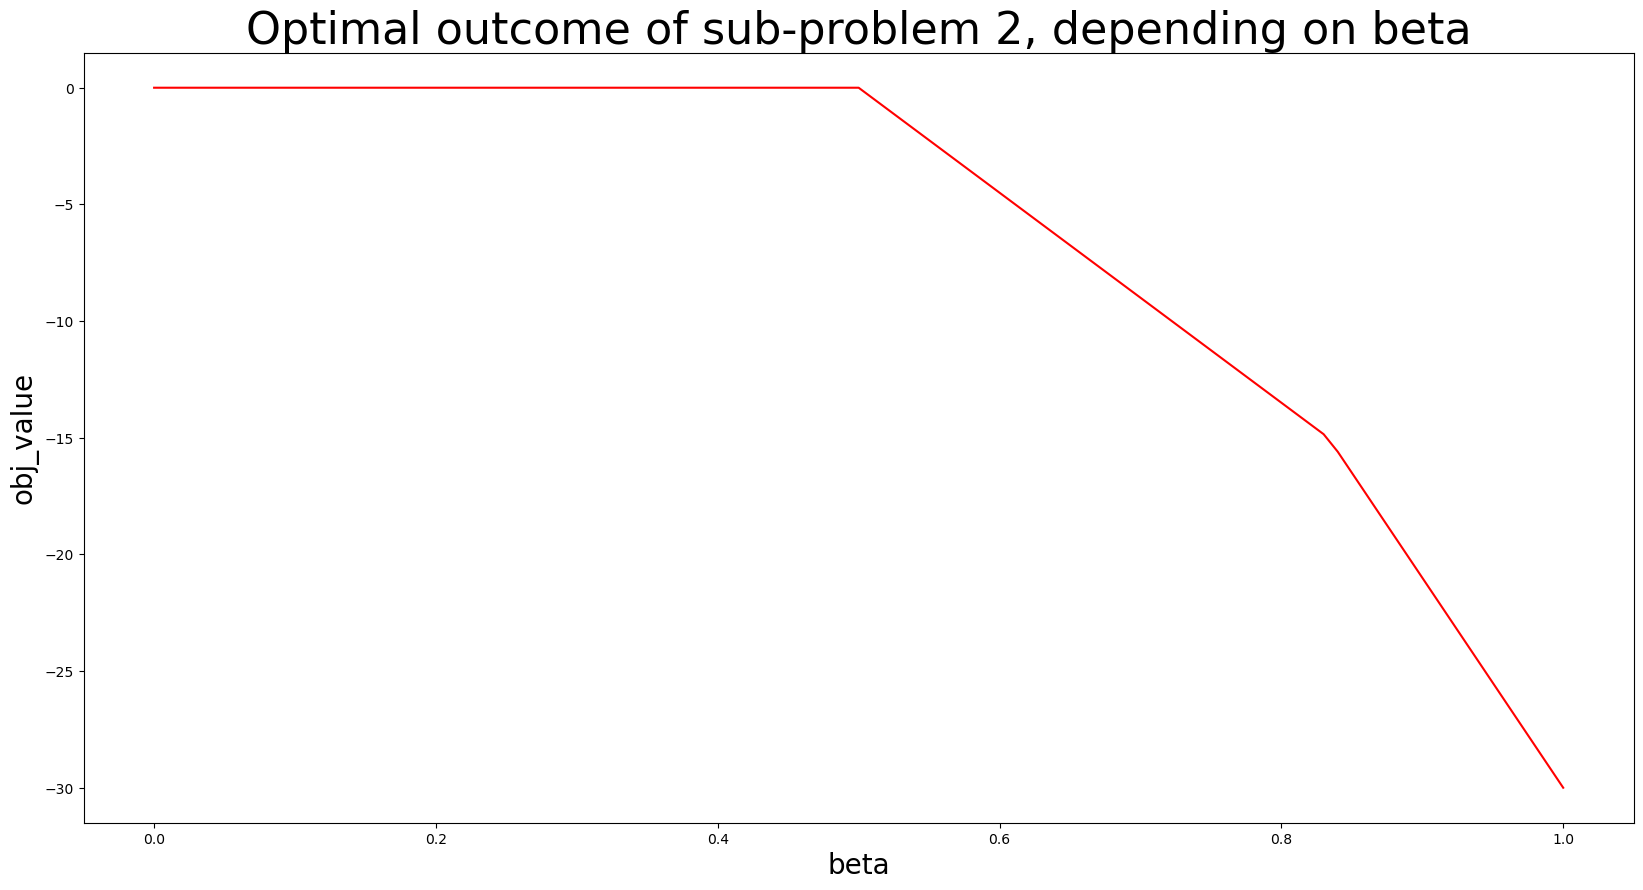

In [5]:
# import PuLP for modelling and solving problems
import pulp

# import matplotlib.pyplot for visualization
import matplotlib.pyplot as plt 

# import pandas and numpy for being able to store solutions in DataFrame
import numpy as np
import pandas as pd

# define step-size
stepSize = 0.01

# initialize empty DataFrame for storing optimization outcomes
solutionTable = pd.DataFrame(columns=["beta","x1_opt","x2_opt","obj_value"])

# declare optimization variables using PuLP and LpVariable
x1 = pulp.LpVariable("x1",lowBound=0)
x2 = pulp.LpVariable("x2",lowBound=0)

# model and solve sub-problem no. 1
linearProblem = pulp.LpProblem("First sub-problem",pulp.LpMaximize)
linearProblem += 2*x1 + 3*x2 # add objective no. 1
linearProblem += x1 + x2 <= 10 # add contraints from original problem statement
# linearProblem += 2*x1 + x2 <= 15
solution = linearProblem.solve()

# store optimal outcome of sub-problem no. 1 into variable
optimalObj1 = pulp.value(linearProblem.objective)

# iterate through beta values from 0 to 1 with stepSize, and write PuLP solutions into solutionTable
for i in range(0,101,int(stepSize*100)):
        # declare the problem again
        linearProblem = pulp.LpProblem("Multi-objective linear maximization",pulp.LpMaximize)
        # add the second objective as objective function to this sub-problem
        linearProblem += 4*x1-2*x2
        linearProblem+= -(5*x2-2*x2)
        # add the constraints from original problem statement
        linearProblem += x1 + x2 <= 10
        linearProblem += 2*x1 + x2 <= 15
        # add additional constraint at level beta, considering optimal outcome of sub-problem no. 1
        linearProblem += 2*x1 + 3*x2 >= (i/100)*optimalObj1
        # solve the problem
        solution = linearProblem.solve()
        # write solutions into DataFrame
        solutionTable.loc[int(i/(stepSize*100))] = [i/100,
                                                     pulp.value(x1),
                                                     pulp.value(x2),
                                                     pulp.value(linearProblem.objective)]

# visualize optimization outcome, using matplotlib.pyplot
# -- set figure size
plt.figure(figsize=(20,10))
# -- create line plot
plt.plot(solutionTable["beta"],solutionTable["obj_value"],color="red")
# -- add axis labels
plt.xlabel("beta",size=20)
plt.ylabel("obj_value",size=20)
# -- add plot title
plt.title("Optimal outcome of sub-problem 2, depending on beta",size=32)
# -- show plot
plt.show()

In [13]:
from pulp import LpProblem, LpMinimize, LpVariable

# Create the problem
problem = LpProblem("Goal_Programming_Problem", LpMinimize)

# Define decision variables
x1 = LpVariable("x1", lowBound=0)
x2 = LpVariable("x2", lowBound=0)
x3 = LpVariable("x3", lowBound=0)
d_minus_1 = LpVariable("d_minus_1", lowBound=0)
d_minus_2 = LpVariable("d_minus_2", lowBound=0)
d_minus_3 = LpVariable("d_minus_3", lowBound=0)
d_minus_4 = LpVariable("d_minus_4", lowBound=0)
d_plus_1 = LpVariable("d_plus_1", lowBound=0)
d_plus_4 = LpVariable("d_plus_4", lowBound=0)

In [14]:
problem += 1 * d_minus_1 + 1 * d_plus_1 + 5 * d_minus_2 + 3 * d_minus_3 + 1 * d_plus_4


In [15]:
# Define the constraints
problem += x1 + x2 + d_minus_1 - d_plus_1 == 80
problem += x1 + d_minus_2 == 70
problem += x1 + d_minus_3 == 45
problem += x2 + x3 + d_minus_4 - d_plus_4 == 90

In [16]:
problem.solve()


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/mg_0328/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/b67180137d4a49d3910ec183f5e9b353-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/6n/znxyq30x5svfn7c24p94vcfctqyqqt/T/b67180137d4a49d3910ec183f5e9b353-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 27 RHS
At line 32 BOUNDS
At line 33 ENDATA
Problem MODEL has 4 rows, 9 columns and 12 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-2) rows, 4 (-5) columns and 5 (-7) elements
0  Obj 125 Primal inf 34.999999 (1)
1  Obj 125
Optimal - objective value 125
After Postsolve, objective 125, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 125 - 1 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from norma

1

In [18]:
# Print the status of the solution
# print("Status:", LpProblem.status[problem.status])

# Print the optimal values of decision variables and deviation variables
print("Optimal values:")
print("x1 =", x1.varValue)
print("x2 =", x2.varValue)
print("x3 =", x3.varValue)
print("d_minus_1 =", d_minus_1.varValue)
print("d_minus_2 =", d_minus_2.varValue)
print("d_minus_3 =", d_minus_3.varValue)
print("d_minus_4 =", d_minus_4.varValue)
print("d_plus_1 =", d_plus_1.varValue)
print("d_plus_4 =", d_plus_4.varValue)

Optimal values:
x1 = 45.0
x2 = 35.0
x3 = 0.0
d_minus_1 = 0.0
d_minus_2 = 25.0
d_minus_3 = 0.0
d_minus_4 = 55.0
d_plus_1 = 0.0
d_plus_4 = 0.0


In [1]:
import pandas as pd 
import numpy as np
from pulp import LpProblem, LpVariable,LpMaximize,LpMinimize,lpSum,LpStatus,LpConstraint
model=LpProblem(sense=LpMaximize)
a=LpVariable(name="a", lowBound=0)
b=LpVariable(name="b", lowBound=0)
m1=a + 2*b <= 8
m2=2*a + b <= 6
model.addConstraint(m1,"m1")
model.addConstraint(m2,"m2")
model+=lpSum((5*a + 7*b)/(a+b))
model.solve()
for i in model.variables():
    print(i.name)
    print(i.varValue)

/Users/mg_0328/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


TypeError: Expressions cannot be divided by a non-constant expression